# Finding the Best Markets to Advertise In

In this project, we will be pretending to be working for an e-learning company that offers programming courses. Most will be on web and mobile development, as well as some courses in data science, game development, etc. To promote our product, we want to spend some money on advertisements. 

**Goal**: Find the two best markets to advertise products in. 

To accomplish our goal, we will be using data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). Their data can be found in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). It would be very expensive to carry out our own survey, so using freeCodeCamp's survey is cost-effective. 

## Exploring the Data

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

survey_data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv",
                         low_memory = False)
print("Number of rows: {0} \nNumber of columns: {1}"
      .format(survey_data.shape[0], survey_data.shape[1]))
pd.options.display.max_columns = 150 # stops truncated column output
survey_data.head(5)

Number of rows: 18175 
Number of columns: 136


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking sample representativity

For our analysis, we will want to answer questions about a *population* of new coders that are interested in the subjects we teach. We'd like to know:
* Where these new coders are located
* What are the locations with greatest number of new coders
* How much money new coders are willing to spend on learning

First, we will generate a frequency distribution table to analyze the distribution of job roles that new coders are interested in.

In [157]:
job_interest_freq = survey_data['JobRoleInterest'].value_counts(normalize=True)*100
job_interest_freq

Full-Stack Web Developer                                                                                                                             11.770595
  Front-End Web Developer                                                                                                                             6.435927
  Data Scientist                                                                                                                                      2.173913
Back-End Web Developer                                                                                                                                2.030892
  Mobile Developer                                                                                                                                    1.673341
                                                                                                                                                       ...    
  Front-End Web Developer,   Mobile Developer,

In [158]:
top_ten_jobs = job_interest_freq.head(10)
print(top_ten_jobs)

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64


From the table above, it seems that new coders are most interested in being Full-Stack Web Developers. Six out of the top ten job roles that new coders are interested in are involved with web development or mobile development. 

We can find the frequency of Web Developer or Mobile Developer showing up by counting the entries that contain "Web Developer" or "Mobile Developer." We'll also drop the null values.

In [159]:
jobs_no_null = survey_data['JobRoleInterest'].dropna()
jobs_no_null.head(10)

1                              Full-Stack Web Developer
2       Front-End Web Developer, Back-End Web Develo...
3       Front-End Web Developer, Full-Stack Web Deve...
4     Full-Stack Web Developer, Information Security...
6                              Full-Stack Web Developer
9     Full-Stack Web Developer,   Quality Assurance ...
11      DevOps / SysAdmin,   Data Scientist, Informa...
13    Back-End Web Developer, Full-Stack Web Develop...
14                             Full-Stack Web Developer
15                             Full-Stack Web Developer
Name: JobRoleInterest, dtype: object

{'Web/Mobile Dev': 86.24141876430205, 'Other': 13.758581235697946}


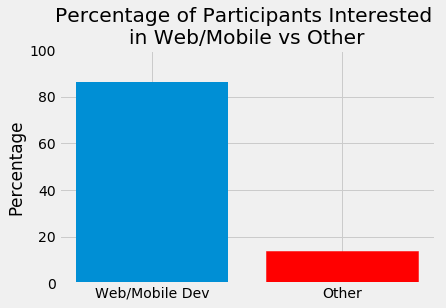

In [160]:
%matplotlib inline
plt.style.use('fivethirtyeight')

web_mobile = jobs_no_null[jobs_no_null.str.contains('Web Developer|Mobile Developer')]
web_mobile_freq = len(web_mobile)/len(jobs_no_null) * 100
other_freq = 100-web_mobile_freq
job_freq = {
    'Web/Mobile Dev': web_mobile_freq,
    'Other': other_freq
}
print(job_freq)
barlist = plt.bar(job_freq.keys(), job_freq.values())
barlist[1].set_color('red')
plt.title('Percentage of Participants Interested \nin Web/Mobile vs Other')
plt.ylabel('Percentage')
plt.ylim([0,100])
plt.show()

According to the data above, most (86.24%) responses included an interest in Web Development or Mobile Development. This is good for us since we focus on web and mobile development. 

## Finding the Best Market

Now that we know our data has the right categories of people for our goal, we can begin analyzing it. The data has the country a participant is living in on the `CountryLive` column. We'll try to find the two best countries to advertise in by looking at the distribution of countries in this column.

First, we'll drop all the columns that don't have a response for their job role. This probably means they're unsure of the job they want to pursue. Then, we'll generate absolute and relative frequency tables for each country to see where most participants reside.

`survey_no_null` will represent the sample we're using. We'll also replace "United States of America" with "USA" and "United Kingdom" with "UK" to make visuals easier to read. 

In [161]:
survey_no_null = survey_data[survey_data['JobRoleInterest'].notnull()].copy()

country_live_abs = survey_no_null['CountryLive'].value_counts()
country_live_rel = survey_no_null['CountryLive'].value_counts(normalize=True)*100

print("Absolute Values\n\
------------------------")
print(country_live_abs.head(5))
print("\nRelative Values\n\
------------------------")
print(country_live_rel.head(5))

Absolute Values
------------------------
United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

Relative Values
------------------------
United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64


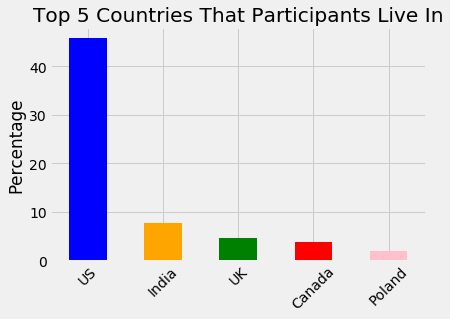

In [162]:
%matplotlib inline
plt.style.use('fivethirtyeight')

country_live_rel.head(5).plot.bar(rot=45, color=['blue', 'orange', 'green', 'red', 'pink'])
plt.title('Top 5 Countries That Participants Live In')
plt.ylabel('Percentage')
plt.xticks(range(5), ['US', 'India', 'UK', 'Canada', 'Poland'])
plt.show()

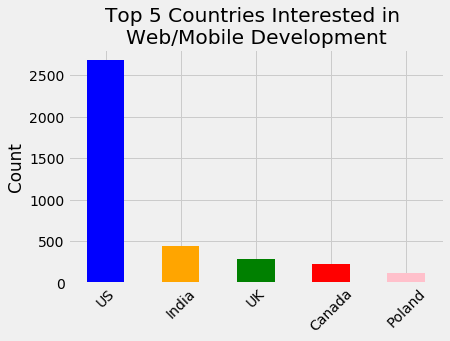

In [163]:
%matplotlib inline
plt.style.use('fivethirtyeight')

survey_no_null['WebOrMobile'] = survey_no_null['JobRoleInterest'].str.contains("Web Developer|Mobile Developer")
country_group = survey_no_null[survey_no_null['WebOrMobile']==True].groupby(['CountryLive', 'WebOrMobile']).size().reset_index(name='counts')
country_group.sort_values(by='counts', ascending=False, inplace=True)
country_group.head(5).plot.bar(x='CountryLive', 
                               y='counts', 
                               legend=False, 
                               rot=45, 
                               color=['blue', 'orange', 'green', 'red', 'pink'])
plt.title('Top 5 Countries Interested in \nWeb/Mobile Development')
plt.ylabel('Count')
plt.xlabel('')
plt.xticks(range(5), ['US', 'India', 'UK', 'Canada', 'Poland'])
plt.show()

From the two graphs above, we can see that the top five countries the survey participants were from include: 
* USA
* India
* UK
* Canada
* Poland

The top 5 countries interested in web or mobile development are the same. 

## How Much Money New Coders Are Willing to Spend
It is important to understand which countries are more willing to spend money so that can avoid marketing to countries that prefer free resources. The `MoneyForLearning` column describes the amount of money (USD) spent by participants from the moment they started coding until the moment they completed the survey.

Since we are selling subscriptions at $59 per month, we need to figure out how much people are willing to spend per month. We can narrow our search down to the top four countries, since they all have English as an official language and our classes are in English. 

Countries we are focused on:
* USA
* India
* UK
* Canada

In [164]:
# replacing 0's with 1's to avoid dividing by 0
survey_no_null['MonthsProgramming'].replace(0, 1, inplace=True)

# column for amount of money each student spent per month
survey_no_null['SpentPerMonth'] = survey_no_null['MoneyForLearning'] / survey_no_null['MonthsProgramming']
survey_no_null['SpentPerMonth'].isnull().sum()

675

We'll need to get rid of null values in the `SpentPerMonth` column.

In [165]:
survey_no_null = survey_no_null[survey_no_null['SpentPerMonth'].notnull()]

Next, we can remove rows with null values in `CountryLive` and then create a frequency table to check if we sitll have enough data for the top four countries. 

In [166]:
survey_no_null = survey_no_null[survey_no_null['CountryLive'].notnull()]

survey_no_null['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

This is still a good amount for each country, so we can compute the average of all of the countries. 

In [167]:
countries_mean = survey_no_null.groupby('CountryLive').mean()
countries_mean['SpentPerMonth'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: SpentPerMonth, dtype: float64

It's strange to see the UK and Canada to have such a lower amount compared to India. Taking into account the [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies) of these countries, we'd exepct the UK and Canadian students to spend more than India. 

Either we have outliers in India, or we don't have enough representative data for the UK and Canada. Or the results are correct! 

## Looking for Extreme Outliers

We can use boxplots to visualize the `SpentPerMonth` column for each country to see the outliers. 

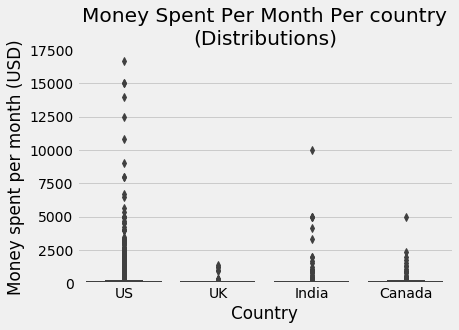

In [169]:
# select our countries of interest
top_4 = survey_no_null[survey_no_null['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y='SpentPerMonth', x='CountryLive', data=top_4)
plt.title('Money Spent Per Month Per country\n(Distributions)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.ylabel("Money spent per month (USD)")
plt.ylim(bottom=0,top=17500)
plt.xlabel("Country")
plt.show()

India has several outliers spending more than \\$2500 per month, Canada has one spending \\$5,000 a month, and the US has many outliers spending greater than \\$5000 per month. 

We will proceed to remove these outliers and recompute the means to get a more realistic USD spent per month for each country.

In [170]:
USA_outliers = top_4[
    (top_4['CountryLive'] == 'United States of America') &
    (top_4['SpentPerMonth'] >= 5000)
]
USA_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,WebOrMobile,SpentPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,N

From analyzing these outliers, we can see that some have attended a bootcamp which would explain their high monthly payments. However, some of these bootcamp students have not gotten very far, so their monthly payment is not representative of how long the bootcamp will be. It is difficult to tell why some of the outliers are spending so much without attending a bootcamp, so we can get rid of these. We will also drop the rows that have attended a bootcamp for less than three months. 

Dropping rows: 
* Who have not attended bootcamps
* Who have only been in bootcamps for three months or less

In [171]:
# remove non bootcamp students
no_bootcamp = top_4[
    (top_4['CountryLive'] == 'United States of America') &
    (top_4['SpentPerMonth'] >= 5000) &
    (top_4['AttendedBootcamp'] == 0)
]

top_4 = top_4.drop(no_bootcamp.index)

# remove bootcamp students programming for three or less months
less_than_3_mos = top_4[
    (top_4['CountryLive'] == 'United States of America') &
    (top_4['SpentPerMonth'] >= 5000) &
    (top_4['MonthsProgramming'] <= 3)
]

top_4 = top_4.drop(less_than_3_mos.index)

Next, we can remove the outliers for India that have spent more than \\$2500 per month.

In [172]:
india_outliers = top_4[
    (top_4['CountryLive'] == 'India') &
    (top_4['SpentPerMonth'] >= 2500)
]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,WebOrMobile,SpentPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN

None of the outliers were in bootcamps and it isn't clear from the survey where the money is being spent. These participants may have been entering the amount they've spent on university classes, so we will remove them. 

In [173]:
# Remove india's outliers
top_4 = top_4.drop(india_outliers.index)

Next, we'll take a look at Canada's outlier at \\$5,000 and remove it if necessary.

In [174]:
canada_outliers = top_4[
    (top_4['CountryLive'] == 'Canada') &
    (top_4['SpentPerMonth'] >= 4500)
]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,WebOrMobile,SpentPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,True,5000.0


This is similar to the US data that we removed since this participant is in a bootcamp, but has only been programming for 2 months. We will remove this from the data as well and compute the mean values again. We will also plot the data on a boxplot again.

In [175]:
# Remove canada's outliers
top_4 = top_4.drop(canada_outliers.index)

In [177]:
# recompute means
top_4.groupby('CountryLive').mean()['SpentPerMonth']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    130.639017
Name: SpentPerMonth, dtype: float64

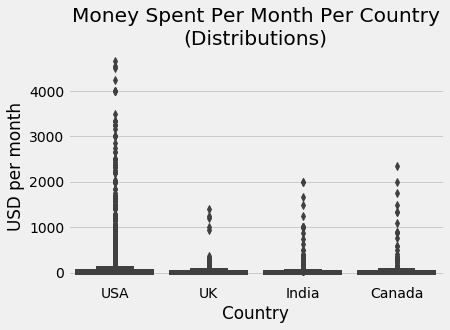

In [179]:
# Visualize mean distribution
sns.boxplot(y='SpentPerMonth', x='CountryLive', data=top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.ylabel('USD per month')
plt.xlabel('Country')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'])
plt.show()

## Determining the Best Two Markets

From the results found above, we can clearly see that we should market in the USA. They contain a large amount of students interested in web/mobile development and spend the most on learning materials. 

Since our classes cost \\$59 per month, we can rule out the UK as a possible area to market in. That leaves choosing between India and Canada. While Canada's demographic seems to be more willing to spend more money, India does nearly double the potential customers

In [180]:
top_4['CountryLive'].value_counts(normalize=True)*100

United States of America    74.922840
India                       11.754115
United Kingdom               7.175926
Canada                       6.147119
Name: CountryLive, dtype: float64

There are several options we can take from here: 
1. Advertise only in the USA
* USA has the highest potential customer number and highest money spent per month
2. Split between three countries
* Spend a majority of marketing in the USA due to higher USD spend and potential customers
* Split the rest of the budget between Canada and India
3. Split between two countries
* Spend a majority in the USA
* Spend the rest on either India or Canada

It is probably best to allow a marketing team to analyze the data further to figure out if it would be better to spend the money in India or Canada, or just solely in the USA.

# Conclusion

In this project, we analyzed the survey data from FreeCodeCamp's survey of new coders to find the best markets to advertise in. The USA is a definitive market to advertise in, while we must do further research on choosing between India or Canada. This task can be passed to the marketing team for their industry knowledge.